In [2]:
import pandas as pd
import statsmodels.api as sm
df=pd.read_excel("weddings.xlsx")


/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
df.head()

,CoupleIncome,BrideAge,Payor,WeddingCost,Attendance
0,130000,22,Bride's Parents,60700,300
1,157000,23,Bride's Parents,52000,350
2,98000,27,Groom's Parents,47000,150
3,72000,29,Bride's Parents,42000,200
4,86000,25,Bride's Parents,34000,250


<Axes: xlabel='CoupleIncome', ylabel='WeddingCost'>

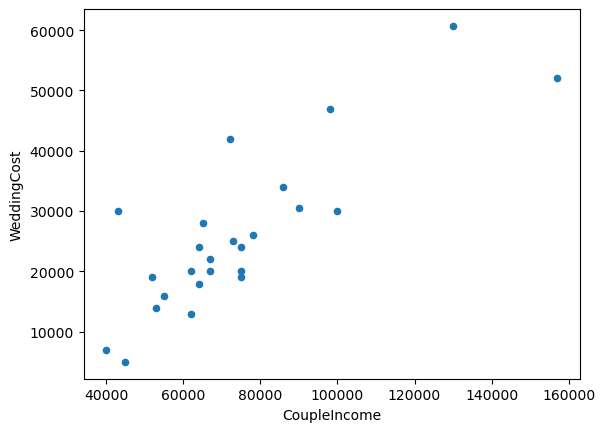

In [8]:
df.plot(kind='scatter', x='CoupleIncome',y='WeddingCost')

In [14]:
df['CoupleIncome'].corr(df['WeddingCost']) #correlation

0.8299366126595498

In [16]:
model=sm.OLS.from_formula('WeddingCost~CoupleIncome',data=df).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WeddingCost   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     50.91
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           2.88e-07
Time:                        09:58:36   Log-Likelihood:                -257.65
No. Observations:                  25   AIC:                             519.3
Df Residuals:                      23   BIC:                             521.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5024.5146   4582.545     -1.096      0.284   -1.45e+04    4455.201
CoupleIncome     0.4176      0.059      7.135      0.000       0.297       0.539
==============================================================================
Omnibus:                        6.111   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                4.699
Skew:                           1.054   Prob(JB):                       0.0954
Kurtosis:                       3.260   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model=sm.OLS.from_formula('WeddingCost~CoupleIncome+BrideAge+Attendance',data=df).fit()


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WeddingCost   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     19.80
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           2.49e-06
Time:                        10:24:07   Log-Likelihood:                -255.45
No. Observations:                  25   AIC:                             518.9
Df Residuals:                      21   BIC:                             523.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -705.4935   1.14e+04     -0.062      0.951   -2.45e+04    2.31e+04
CoupleIncome     0.3168      0.079      4.015      0.001       0.153       0.481
BrideAge      -229.3045    382.523     -0.599      0.555   -1024.805     566.196
Attendance      49.2808     28.400      1.735      0.097      -9.780     108.342
==============================================================================
Omnibus:                        6.638   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                4.768
Skew:                           1.020   Prob(JB):                       0.0922
Kurtosis:                       3.645   Cond. No.                     6.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df['Payor']=df['Payor'].map({"Bride's Parents":1,"Groom's Parents":0})

In [26]:
df.head()

,CoupleIncome,BrideAge,Payor,WeddingCost,Attendance
0,130000,22,1,60700,300
1,157000,23,1,52000,350
2,98000,27,0,47000,150
3,72000,29,1,42000,200
4,86000,25,1,34000,250


In [32]:
model_mlr=sm.OLS.from_formula('WeddingCost~CoupleIncome+BrideAge+Payor+Attendance',data=df).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WeddingCost   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     15.31
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.97e-06
Time:                        10:41:18   Log-Likelihood:                -254.71
No. Observations:                  25   AIC:                             519.4
Df Residuals:                      20   BIC:                             525.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      664.5624   1.14e+04      0.058      0.954   -2.32e+04    2.45e+04
CoupleIncome     0.3238      0.079      4.112      0.001       0.160       0.488
BrideAge      -233.3111    380.541     -0.613      0.547   -1027.105     560.483
Payor        -3712.8716   3359.726     -1.105      0.282   -1.07e+04    3295.394
Attendance      54.1315     28.591      1.893      0.073      -5.507     113.770
==============================================================================
Omnibus:                        6.300   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.383
Skew:                           0.965   Prob(JB):                        0.112
Kurtosis:                       3.697   Cond. No.                     6.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""